In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from django.core.wsgi import get_wsgi_application
from matplotlib import pyplot as plt
import sys
sys.path.append(r'/home/sanjeev/models/ribbonsemble/ribbonsemble/scripts/')
import load_properties as lp
import load_soldproperties as lsp
%matplotlib inline
import mplleaflet

In [2]:
df = pd.read_csv('sold_lastpage.csv')

In [3]:
lp.setup_environment()

import properties...


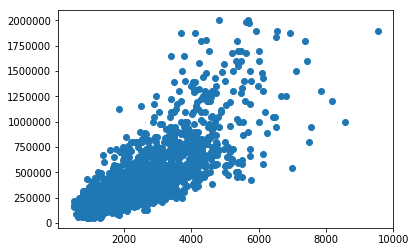

In [4]:
plt.scatter(df['listing_data_building_area_sq_ft'],df['listing_data_sale_price'])

Text(0.5,1,'sale price density')

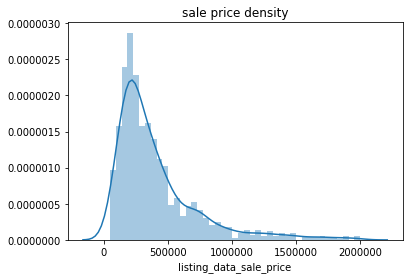

In [5]:
ax = plt.axes()
sns.distplot(df['listing_data_sale_price'],ax=ax)
ax.set_title('sale price density')

Text(0.5,1,'charlotte: price distribution per num bathrooms')

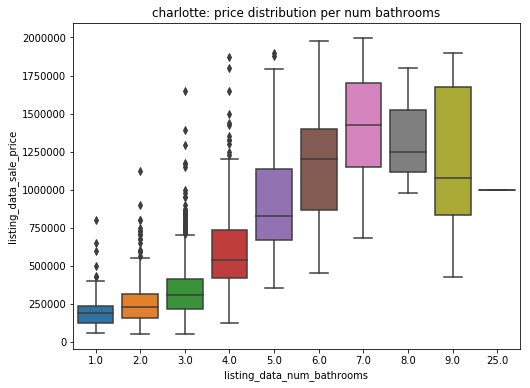

In [6]:
var = 'listing_data_num_bathrooms'
data = pd.concat([df['listing_data_sale_price'],df[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='listing_data_sale_price',data=data)
ax.set_title('charlotte: price distribution per num bathrooms')

Text(0.5,1,'charlotte: price distribution per num bedrooms')

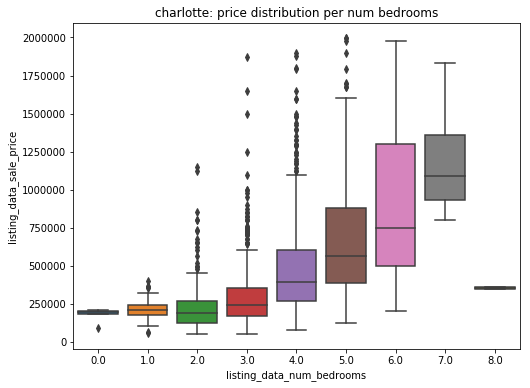

In [7]:
df_f = df[df['listing_data_num_bedrooms']<10]
var = 'listing_data_num_bedrooms'
data = pd.concat([df_f['listing_data_sale_price'],df_f[var]],axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y='listing_data_sale_price',data=data)
ax.set_title('charlotte: price distribution per num bedrooms')

Text(0.5,1,'price sold vs year built')

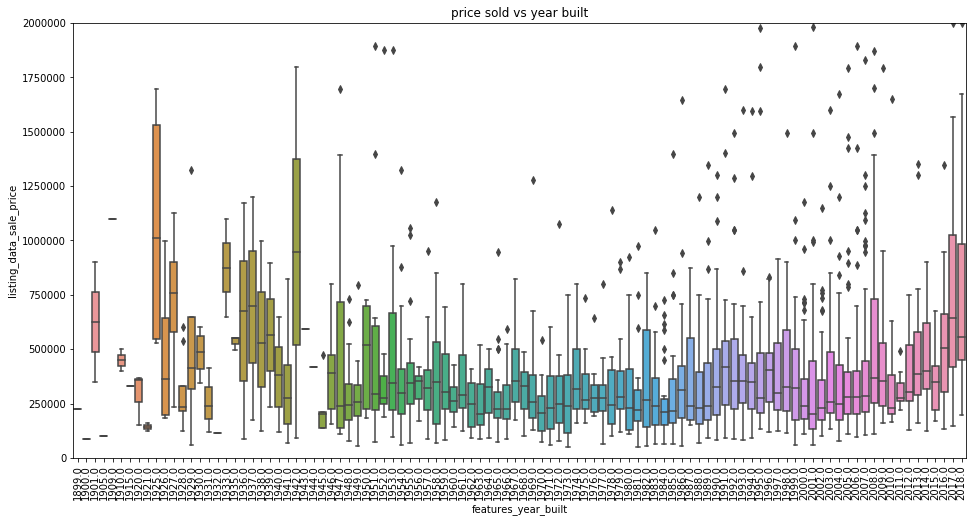

In [8]:
var = 'features_year_built'
data = pd.concat([df['listing_data_sale_price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="listing_data_sale_price", data=data)
fig.axis(ymin=0, ymax=2000000)
plt.xticks(rotation=90)
ax.set_title('price sold vs year built')

Text(0.5,1,'correlation heat map')

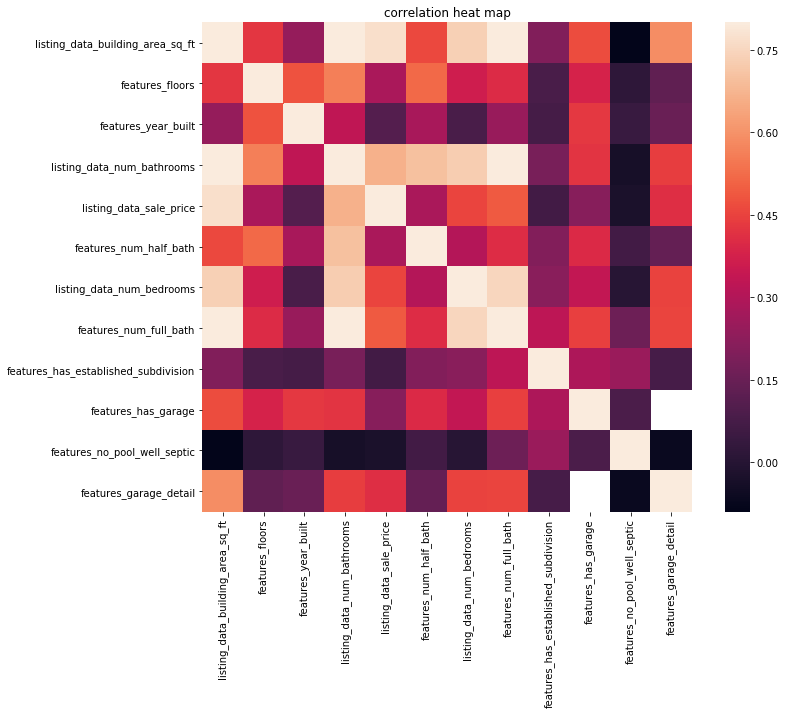

In [9]:
#correlation matrix
df_corr = df.drop(['features_is_foreclosure'],axis=1)
corrmat = df_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
ax.set_title('correlation heat map')


In [10]:
from hedonic_model.models import SoldProperty

In [11]:
from hedonic_model.models import ListProperty

In [12]:
from django_pandas.io import read_frame
qs = SoldProperty.objects.all()
df = read_frame(qs)


In [13]:
dfs = df[['longitude','latitude','sold_price']]

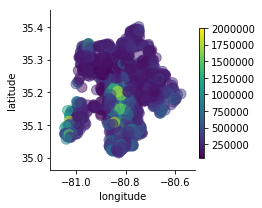

In [14]:
g = sns.FacetGrid(dfs, palette = 'seismic')


    
vmin, vmax = 50000, 2000000

cmap = plt.cm.viridis

norm=plt.Normalize(vmin=vmin, vmax=vmax)

g = g.map(facet_scatter, 'longitude', 'latitude', "sold_price",
          s=100, alpha=0.5, norm=norm, cmap=cmap)


# Make space for the colorbar
g.fig.subplots_adjust(right=.92)

# Define a new Axes where the colorbar will go
cax = g.fig.add_axes([.94, .25, .02, .6])

# Get a mappable object with the same colormap as the data
points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)

# Draw the colorbar
g.fig.colorbar(points, cax=cax)


In [15]:
def mapHomes(df):
    g = sns.FacetGrid(dfs, palette = 'seismic')
    vmin, vmax = 15000, 500000
    cmap = plt.cm.winter
    norm=plt.Normalize(vmin=vmin, vmax=vmax)
    g = g.map(facet_scatter, 'longitude', 'latitude', "sold_price",
              s=50, alpha=0.8, norm=norm, cmap=cmap)
    # Make space for the colorbar
    g.fig.subplots_adjust(right=.92)
    # Define a new Axes where the colorbar will go
    cax = g.fig.add_axes([.94, .25, .02, .6])
    # Get a mappable object with the same colormap as the data
    points = plt.scatter([], [], c=[], vmin=vmin, vmax=vmax, cmap=cmap)
    # Draw the colorbar
    g.fig.colorbar(points, cax=cax)
    mplleaflet.show()

In [16]:
dfslim=dfs[(dfs['sold_price']>150000) & (dfs['sold_price']<5000000)]

In [17]:
mapHomes(dfslim)

In [18]:
df.columns

Index(['id', 'street_address_1', 'street_address_2', 'city', 'state',
       'zip_code', 'latitude', 'longitude', 'hc_slug', 'lowercase_slug',
       'sold_price', 'num_bedrooms', 'num_bathrooms', 'building_area_sq_ft',
       'home_type', 'sale_price_history', 'certified_max_bid',
       'certified_max_bid_created_at', 'house_canary_avm', 'red_bell_ave',
       'red_bell_ar_bpo', 'red_bell_bpo', 'num_floors', 'rx_num_half_bath',
       'rx_num_full_bath', 'year_built', 'listing_status', 'flooring',
       'interior_features', 'remax_url', 'subdivision', 'description',
       'is_foreclosure', 'has_septic', 'has_pool',
       'has_established_subdivision', 'has_well', 'has_garage',
       'no_pool_well_septic', 'local_school_quality', 'garage_size',
       'img_path_header', 'img_paths_gallery'],
      dtype='object')

In [19]:
dslim = df[['zip_code','sold_price','num_bedrooms','num_bathrooms','year_built']]

In [21]:
dslim

,zip_code,sold_price,num_bedrooms,num_bathrooms,year_built
0,28214,189900,4,3,1998
1,28270,239900,3,2,1977
2,28277,274000,4,3,1982
3,28210,535000,5,4,1999
4,28209,364900,3,2,1953
5,28277,339900,4,3,2001
6,28215,249000,4,3,2006
7,28214,85000,2,1,1900
8,28277,500000,4,4,1999
9,28270,799000,5,5,2017


In [22]:
#missing data
total = dslim.isnull().sum().sort_values(ascending=False)
percent = (dslim.isnull().sum()/dslim.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
year_built,0,0.0
num_bathrooms,0,0.0
num_bedrooms,0,0.0
sold_price,0,0.0
zip_code,0,0.0


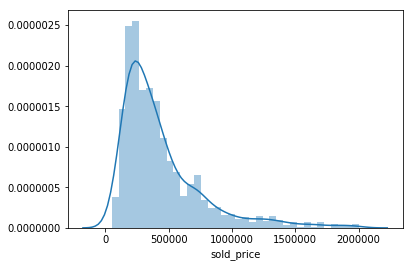

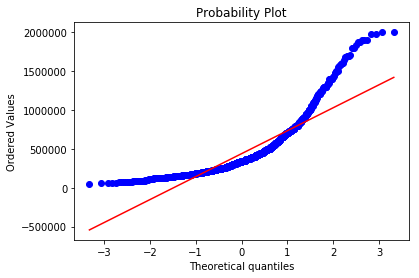

In [23]:
sns.distplot(dslim['sold_price'])
fig = plt.figure()
res = stats.probplot(dslim['sold_price'], plot=plt)

In [24]:
#applying log transformation
dslim['sold_price'] = np.log(dslim['sold_price'])

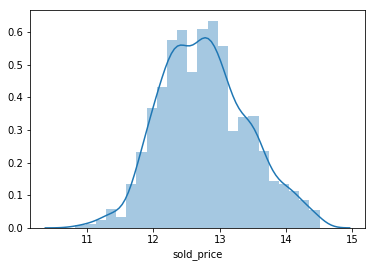

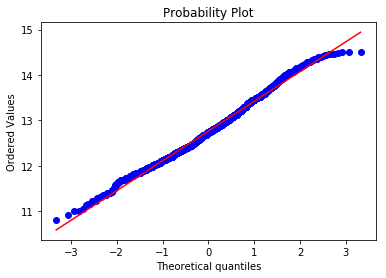

In [25]:
sns.distplot(dslim['sold_price']);
fig = plt.figure()
res = stats.probplot(dslim['sold_price'], plot=plt)